Simple EDA combined with basic data cleaning and dat visualization

The purpose of this EDA is to get familiarized with commonly used Python DS libraries - Pandas, Numpy, and Matplotlib.

The goal of this EDA is to find out which type of dog breeds are most aggresive and the type of injuries that are most common.

This dataset observes dog attacks spanning from 2010-2015 in Geelong City, Austrlia. 
Data downloaded from: https://data.gov.au/data/dataset/geelong-dog-attacks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dogattacks.csv')

In [3]:
df.head()

,suburb,incident_date,injuries,offender,victim
0,Ocean Throughway,1/4/2015,no injuries,??,Dog
1,Ocean Grove,1/6/2015,bite marks,Jack Russell,Person/dog
2,Grovedale,1/7/2015,bites,??,Dog
3,Norlane,1/7/2015,bites,??,Cat
4,Corio,1/8/2015,bites,??,Dog


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786 entries, 0 to 785
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   suburb         781 non-null    object
 1   incident_date  755 non-null    object
 2   injuries       462 non-null    object
 3   offender       730 non-null    object
 4   victim         780 non-null    object
dtypes: object(5)
memory usage: 30.8+ KB


In [5]:
df.isnull().sum()

suburb             5
incident_date     31
injuries         324
offender          56
victim             6
dtype: int64

There is a lot of missing data here. Missing data/suburb columns aren't very important for the type of analysis that I am trying accomplish. I'm simply trying to understand which dog breeds are more aggresive or have a higher frequency of attacks.

Any rows with missing data in the offender column need to be removed since this is critical data for the analysis. 

In [6]:
df.describe()

,suburb,incident_date,injuries,offender,victim
count,781,755,462,730,780
unique,92,585,148,341,89
top,Corio,2/6/2012,Death,Unknown,Dog
freq,77,6,66,64,299


In [7]:
df.offender.value_counts(dropna=False)

Unknown                 64
NaN                     56
Staffy                  42
German Shepherd         20
U/K                     19
                        ..
Whippet X Woulfhound     1
not attached to RFS      1
Spoodle                  1
German sheperd           1
Wolfhound/Cross          1
Name: offender, Length: 342, dtype: int64

We need to remove any row with the 'Unknown', 'NaN', 'U/K'(assuming this stands for 'Unkown'). Are there any other acronyms used throughout the dataframe that could mean missing data? 

In [8]:
df.offender.value_counts()[:20]

Unknown            64
Staffy             42
German Shepherd    20
U/K                19
Blue Heeler        17
?                  16
??                 15
Husky              12
Jack Russell       11
Kelpie              9
Bull Terrier        9
Rottweiler          9
Staffys             7
Border Collie       7
u/k                 6
Bull Mastiff        6
Staffy's            6
Staffy X            5
Staffy x            5
Unsure              5
Name: offender, dtype: int64

In [9]:
df.offender.unique()

array(['??', 'Jack Russell', 'Sib Husky', 'Mastiff', 'Staf', 'Great Dane',
       'POMX', 'Staffy', 'American Staffordshire', 'Labradoodle',
       'Maltese x', 'no specified', 'Not specified on rfs',
       'Hungarian Vizsla', 'Bull Terrier', 'Dalmatian',
       'Alaskan/Malamute', 'Staghound, Mastiff/Cross',
       'not attached to RFS', 'Rottweiler', 'Blue Heeler',
       'Pomeranian/Cross', 'German Shepherd', '?', 'Shitzhu', 'kelpie x',
       'Pitbull like', 'Lab x', 'bulldog x', 'bull terrier ',
       'Blue Heeler x', '2 pitbulls& whippet', 'poodle x Schnauzer ',
       'Pitbull x', 'Lab  ', 'Husky, German Shepherd', 'Samoyed',
       'Heeler', 'Kelpie', 'St Bernard', 'StaffyJack Russell',
       'Weimaraner', 'Staffy x 2', nan, 'Pitbull X', 'Huskies X 2',
       'Bull Mastiff', 'Dachshund', 'Bulldog x', 'Mastiff X',
       'Rotweilers', 'American Staffie', 'Border Collie', 'Husky',
       'Staffy x2 ', 'Staffys', 'Lab', 'German Shephard', 'Boxer',
       'German Shephard/Rotti'

2 observations:

1. It seems like there is a lot more missing data than initially observed. '??', '?', 'u/k', are just a few more examples of missing data. I will create a list with all of the different words used throughout the dataframe which signify missing data. 

2. Dog breeds are inconsistently written. Example - 'Staffy' is written many different ways. 'Staffy', 'Staffy X', 'staffy' to name a few. I'll need to go through the dataset and make sure that each dog breed is consistently written in order to get accurate stats. 

In [10]:
# I will also include vague dog descriptions in the list of unknown data since it's subjective. 
# Example - 'size of ridgeback, boxer face'. This doesn't necessarily mean that it's a boxer. 


missing_data = ['Unknown', 'unknown', 'NaN', 'U/K', '?', '??', 'u/k', 'no specified', 'Not specified on rfs', 
                'not attached to RFS', 'size of ridgeback, boxer face', 
                "notes updated by officer but no description of offending dog, no ID # and no MC No dog registered at this address at the time of incident, two lapsed rego only??",
                'notes updated by officer but no description of offending dog, no ID # and no MC',
                'notes updated by officer but no animal link to this RFS',
                'See RFS 946389',
                'Dog seized and taken to GAWS but no animal link to this RFS',
                'notes says dog impounded but no animal link to this RFS',
                'officer spoken to owner but dog details not updated on RFS, not linked to animal module',
                "Officer took statement from owner but have not added offending dog\'s detail, no animal linked to this RFS",
                'no dogs currently registered at 2/2 Gumtree Ct at the time of incident,there were 2 lapsed rego',
                'according to RFS notes dog owner interviewed and dog signed over to Council, no details of offending dog',
                'RFS not linked to animal', 
                'Officers attended site and spoke to dog owner but not details or animal link to this RFS',
                'No dog registered at this address at the time of incident, two lapsed rego only??',
                'notes says  Impounding Officer to issue infringement for DAL. No animal linked to this RFS',
                "RFS notes not updated with offending dog's details",
                'notes said infringement issued but no animal linked to this RFS',
                'Anon Call, no dog sighted', 
                'dog was apparently given away 2 days after incident',
                'unknown where the dog came from', 
                '3rd RFS for same complaint, mavtel done RFS still Suspended',
                'No dogs registered to the property',             
               ]  

In [11]:
df['offender'] = df['offender'].replace(missing_data, np.nan)

In [12]:
df.offender.unique()

array([nan, 'Jack Russell', 'Sib Husky', 'Mastiff', 'Staf', 'Great Dane',
       'POMX', 'Staffy', 'American Staffordshire', 'Labradoodle',
       'Maltese x', 'Hungarian Vizsla', 'Bull Terrier', 'Dalmatian',
       'Alaskan/Malamute', 'Staghound, Mastiff/Cross', 'Rottweiler',
       'Blue Heeler', 'Pomeranian/Cross', 'German Shepherd', 'Shitzhu',
       'kelpie x', 'Pitbull like', 'Lab x', 'bulldog x', 'bull terrier ',
       'Blue Heeler x', '2 pitbulls& whippet', 'poodle x Schnauzer ',
       'Pitbull x', 'Lab  ', 'Husky, German Shepherd', 'Samoyed',
       'Heeler', 'Kelpie', 'St Bernard', 'StaffyJack Russell',
       'Weimaraner', 'Staffy x 2', 'Pitbull X', 'Huskies X 2',
       'Bull Mastiff', 'Dachshund', 'Bulldog x', 'Mastiff X',
       'Rotweilers', 'American Staffie', 'Border Collie', 'Husky',
       'Staffy x2 ', 'Staffys', 'Lab', 'German Shephard', 'Boxer',
       'German Shephard/Rotti', 'Greyhound',
       'Staffy &West Highland Terrier', 'Blue Heeler/Kelpie', 'Staffies',

It took a lot of copy/pasting bad data from the df to the 'missing_data' variable but it looks much cleaner now. 

In [13]:
df.head(5)

,suburb,incident_date,injuries,offender,victim
0,Ocean Throughway,1/4/2015,no injuries,NaN,Dog
1,Ocean Grove,1/6/2015,bite marks,Jack Russell,Person/dog
2,Grovedale,1/7/2015,bites,NaN,Dog
3,Norlane,1/7/2015,bites,NaN,Cat
4,Corio,1/8/2015,bites,NaN,Dog


I will remove the entire row wherever there is a NaN in the offender column. 

In [14]:
df.shape

(786, 5)

In [15]:
df.dropna(subset=['offender'], inplace=True)
df.head(5)

,suburb,incident_date,injuries,offender,victim
1,Ocean Grove,1/6/2015,bite marks,Jack Russell,Person/dog
6,Drysdale,1/22/2015,"death, bites",Sib Husky,Cat/ sheep
7,Newtown,1/28/2015,bites,Mastiff,Dog
8,North Geelong,1/29/2015,bites,Staf,Dog
9,St Leonards,1/30/2015,Bites,Great Dane,Dog


In [16]:
# Approximately 200 rows were removed after deleting missing data. 

df.shape

(582, 5)

Initial thoughts below:

1. Create a dictionary of dog breeds to keep track of all of the different ways they were spelt in the original dataset
2. The dictionary will then be used to consolidate the different spellings of the same breed into one

After getting started on the dictionary (below) I realized that this would take too long (copy/pasting) so I decided to output what I currently have into an excel file and make the changes directly in excel, before reuploading the file. 

There were many different mixed dog breeds so I consolidated them into whatever type of breed was written first. This might not be the best practice but it was done in the interest of time as this was just to practice. 

Example: 'Lab X' was changed to 'Labrador' or 'Staffordshire/CrossKelpie/Cross' was changed to 'Staffordshire Bull Terrier' 

In [17]:
# df.offender.unique()

# all pitbuls into pitbull terrier
# stafford bull terrier all as wel
# if more then 1 dog attacked of the same breed then i counted that as 1 attack
# if more than 1 dog attacked but of dif breeds then I 
# cross dogs were put into the dog category befre the X


# dog_breeds = {
#    'Jack Russell': ['Jac Russell', 'Jack Russells'],
#    'Staffordshire Bull Terrier': ['Staffy', 'Staf', 'English Staffy', '2 Staffies', 'Staffy X'],
#    'Rottweiler': ["2 Rott's", 'Rottweiler', 'Rotweilers'],
#    'Beagle':[],
#    'German Shepherd': ['2 German Shepherds', '3 x German Shepherds', 'German Shepherd', 'German Shephard'],
#    'Great Dane': ['Great Danes'],
#    'Siberian Husky': ['Huskies X 2'],
#    'Bulldog': ['2 Bulldogs', 'Australian Bull Dog', 'bulldog x', 'Bulldog x'  ],
#    'Boxer': ['1 x Boxer pup']
#    'Labrador': ['Labradors', 'Lab x' ]
#    'Siberian Husky': ['Sib Husky']
#    'Mastiff': ['Mastiff']
#    'Pitbull Terrier': ['Pitbull like', 'Pitbull x','Pitbull X'  ]
#            }

            
# dog_breeds2 = {keys: old_keys for old_keys, old_values in dog_breeds.items() for keys in old_values}
# df.offender = df.offender.replace(dog_breeds2)

In [18]:
# df.to_csv('amended_offender_names.csv', index=False)

In [19]:
df2 = pd.read_csv('amended_offender_names2.csv')

In [20]:
df2.shape

(582, 5)

In [21]:
df2.tail(10)

,suburb,incident_date,injuries,offender,victim
572,Little River,11/28/2010,NaN,German Shepherd,Sheep
573,Grovedale,11/30/2010,NaN,Border Collie,Child
574,Norlane,12/7/2010,NaN,Staffordshire Bull Terrier,Dog
575,Corio,12/14/2010,NaN,Bull Arab,Person
576,Unknown,12/20/2010,NaN,Staffordshire Bull Terrier,Dog
577,Grovedale,12/20/2010,NaN,Staffordshire Bull Terrier,Dog
578,Unknown,12/21/2010,NaN,Terrier,Person
579,Moolap,12/27/2010,NaN,Staffordshire Bull Terrier,Sheep
580,Ceres,12/31/2010,NaN,NaN,Person
581,Grovedale,12/6/2011,NaN,NaN,Person


In [22]:
df2.offender.value_counts()[:20]

Staffordshire Bull Terrier    147
German Shepherd                43
Heeler                         37
Pit Bull Terrier               35
Husky                          32
Rottweiler                     24
Jack Russell                   22
Labrador                       21
Australian Kelpie              19
Boxer                          13
Border Collie                  12
Bullmastiff                    12
Maltese                        12
Bull Terrier                   11
Bulldog                        11
Mastiff                        11
Ridgeback                       9
Great Dane                      7
Greyhound                       7
Terrier                         6
Name: offender, dtype: int64

In [23]:
df2.offender.value_counts()[-20:]

Wirehaired Terrier        1
Hungarian Vizsla          1
St Bernard                1
Tibetan Terrier           1
Shar Pei                  1
Lhasa Apso                1
Keeshond                  1
Golden Retriever          1
Schnauzer                 1
Woldhound                 1
Kangal                    1
Cockerspaniel             1
Spoodle                   1
Koolie                    1
Chow Chow                 1
Cattledog                 1
Newfoundland              1
French Poodle             1
Curly Haired/Retriever    1
Samoyed                   1
Name: offender, dtype: int64

In [24]:
# Amended all of the names in the 'offender' category. Added 'unknown' where the breed wasn't clear

df2.dropna(subset=['offender'], inplace=True)

In [25]:
df2.offender.value_counts().sum()

558

In [26]:
df2.tail(10)

,suburb,incident_date,injuries,offender,victim
570,Corio,11/29/2010,NaN,Husky,Cat
571,Wallington,11/30/2010,NaN,Husky,Chickens
572,Little River,11/28/2010,NaN,German Shepherd,Sheep
573,Grovedale,11/30/2010,NaN,Border Collie,Child
574,Norlane,12/7/2010,NaN,Staffordshire Bull Terrier,Dog
575,Corio,12/14/2010,NaN,Bull Arab,Person
576,Unknown,12/20/2010,NaN,Staffordshire Bull Terrier,Dog
577,Grovedale,12/20/2010,NaN,Staffordshire Bull Terrier,Dog
578,Unknown,12/21/2010,NaN,Terrier,Person
579,Moolap,12/27/2010,NaN,Staffordshire Bull Terrier,Sheep


In [27]:
df2.shape

(558, 5)

After removing the unknown dog breeds once again, we are left with 558 rows.

"Generally speaking, the American Staffordshire terrier is nearly the same breed as the American pit bull terrier. Today, the main difference is in appearance. The American Staffordshire terrier is bred in part for AKC conformation and conforms to a stricter standard, particularly in size range."

https://www.thesprucepets.com/american-staffordshire-terrier-1117908#:~:text=Generally%20speaking%2C%20the%20American%20Staffordshire,standard%2C%20particularly%20in%20size%20range.



In [28]:
(df2.offender.value_counts() / df2.offender.notnull().sum())[:10]

Staffordshire Bull Terrier    0.263441
German Shepherd               0.077061
Heeler                        0.066308
Pit Bull Terrier              0.062724
Husky                         0.057348
Rottweiler                    0.043011
Jack Russell                  0.039427
Labrador                      0.037634
Australian Kelpie             0.034050
Boxer                         0.023297
Name: offender, dtype: float64

In [29]:
df2.offender.value_counts()[:10]

Staffordshire Bull Terrier    147
German Shepherd                43
Heeler                         37
Pit Bull Terrier               35
Husky                          32
Rottweiler                     24
Jack Russell                   22
Labrador                       21
Australian Kelpie              19
Boxer                          13
Name: offender, dtype: int64

In [30]:
df2.offender.value_counts().sum()

558

Based on the information provided by Geelong City it seems like that Staffordhire Bull Terriers accounted for more than 26% of all dog attacks. Combining that with that Pit Bull Terrier we get: 147+35 = 182 attacks. Percentage wise that's 32.62%. Nearly a third of all animal attacks that occurred between 2010 - 2015 were by either the Staffordshire Bull Terrier or the Pit Bull Terrier.  

In [31]:
dog_attacks = df2.offender.value_counts() 

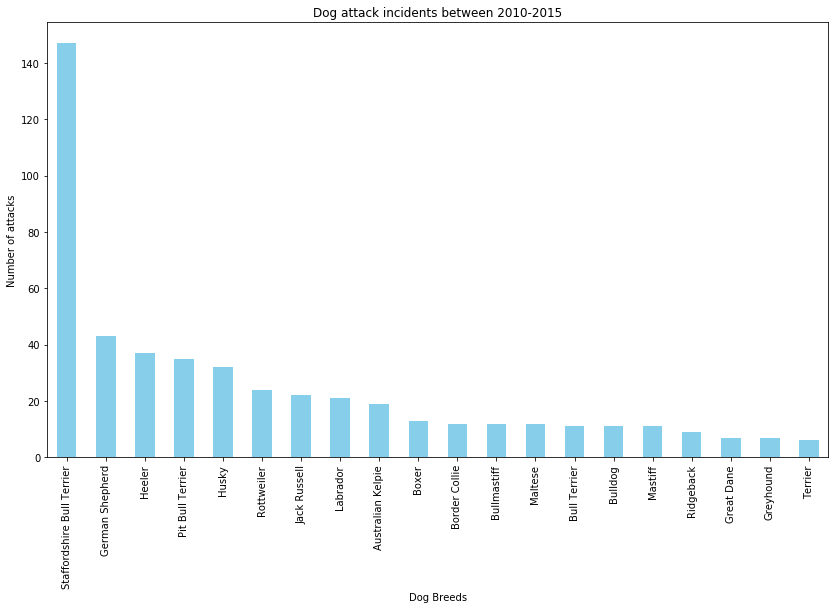

In [32]:
attack_count = df2['offender'].value_counts().nlargest(20).plot(kind='bar',
                                    figsize=(14,8),
                                    title="Dog attack incidents between 2010-2015", color = 'skyblue')

attack_count.set_xlabel("Dog Breeds")
attack_count.set_ylabel("Number of attacks")

plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 

plt.rcParams.update({'font.size': 12})

In [33]:
df2.injuries.value_counts()[:20]

Death              39
Bite               24
Broken Skin        18
Dead               18
U/K                10
Bruising            8
Unknown             8
Severe Tearing      7
Taken to vet        7
bite                7
Bite                6
Puncture wounds     6
death               6
Puncture wound      5
Puncture Wounds     4
?                   4
bites               4
Puncture            4
Bite on arm         3
Minor Bites         3
Name: injuries, dtype: int64

Things to do later:

- Clean up incidents data
- Compare the different breeds to the type of incidents
- Visualize incidents data with the type of breed to see which dogs lead to more severe cases
- Try to find a dataset with the amount of registered animals in Greater Geelong between 2010-2015. I'll be able to understand if Staffordshire Bull Terriers really do attack proportionally more often in comparison to other dog breeds. Or, do they attack more often simply because they are more popular and thus there are more of them in the city? 